# TP n°1 : Attaque cérébrale

## Installation


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from skimage import io
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate, resize
from skimage.transform import resize
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Partie 1: Segmentation de l'image


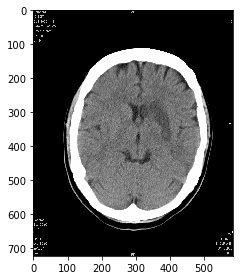

In [3]:
#Affichage de l'image d'origine
image= mpimg.imread('CT_SubCortInf.jpg') 
io.imshow(image) 

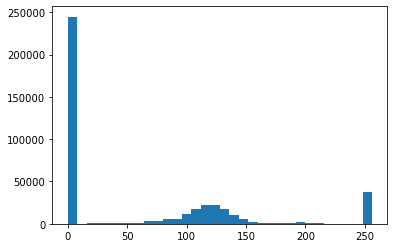

In [4]:
#Histogramme de l'image
image=image[...,1]
fig,ax=plt.subplots(1,1)
fig=ax.hist(image.ravel(),bins=32,range=[0,256])
plt.show()

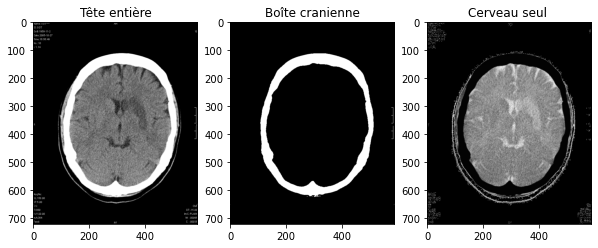

In [5]:
#Affichage de l'image de la tête entière en noir et blanc
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.title("Tête entière")
plt.imshow(image, cmap = "gray")

#Affichage de l'image de la boîte cranienne en noir et blanc
boite = (image > 240)
plt.subplot(1,3,2)
plt.title("Boîte cranienne")
plt.imshow(boite, cmap = "gray")

#Affichage du cerveau sans la boite cranienne
cerveau=boite-image
plt.subplot(1,3,3)
plt.title("Cerveau seul ")
plt.imshow(cerveau, cmap = "gray")

Après avoir obtenu nos trois images,nous allons faire un open (érosion puis dilation) afin d'avoir une image nette sans bruit.

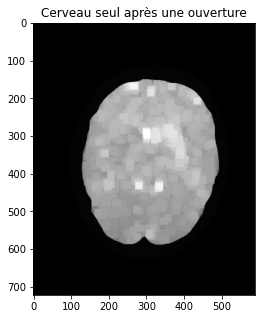

In [6]:
#Open
kernel = np.ones((5,5),np.uint8)
openC=cv.morphologyEx(cerveau, cv.MORPH_OPEN, kernel, iterations=4)

#Affichage
plt.figure(figsize=(5, 5))
plt.title("Cerveau seul après une ouverture")
plt.imshow(openC,cmap="gray")
plt.show()

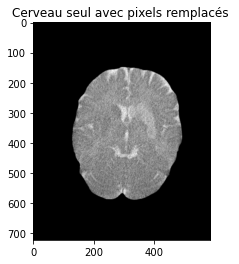

In [7]:
#Changer les pixels < 25 afin d'avoir une image nette (remplacer par du noir)

for i in range(len(openC)):
    for j in range (len(openC[i])):  #Parcourir lignes et colonnes du tableau
        if openC[i,j]<25:
            cerveau[i,j]=0
mask=cerveau            

#Affichage
plt.figure()
plt.title("Cerveau seul avec pixels remplacés ")
plt.imshow(cerveau,cmap='gray')

Dorénavant, on detecte de la ligne de symétrie du cerveau en prenant comme repère le centroïde du cerveau et la protubérance occipitale

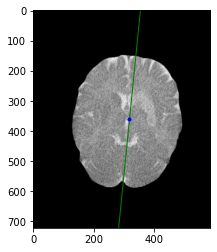

In [8]:
#Initialisation
X=[]
Y=[]
regions = regionprops(cerveau)
#Calcul des éléments géometriques 
for props in regions:
    y0, x0 = props.centroid
    if math.isnan(y0)==False:
        Y.append(y0)
    if math.isnan(x0)==False: 
        X.append(x0)
X=np.mean(X)
Y=np.mean(Y)
x=np.linspace(0,400,2)
y=-10*x+3550

#Affichage
plt.plot(x, y, color="green", linewidth=1)
plt.plot(X,Y, marker=".", color="blue")
plt.imshow(cerveau,cmap='gray')


## Partie 2: Comparaison entre les éléments gauche-droite de chaque cluster (LCS, MG,MB) du cerveau, est à extraire (sous forme de différence relative), suite à la détection de la ligne de symétrie du cerveau

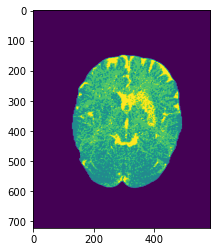

In [9]:
# Change color to RGB (from BGR)
mask = cv.cvtColor(cerveau, cv.COLOR_BGR2RGB)
 
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = cerveau.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 4
#also random centres are initially choosed for k-means clustering
k = 4
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((cerveau.shape))
 
#Affichage de l'image nette
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250            
plt.imshow(segmented_image) 


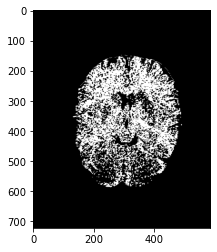

In [10]:
#For Cluster 1
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster1=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=179:
            Cluster1[i,j]=0

plt.imshow(Cluster1,cmap='gray')

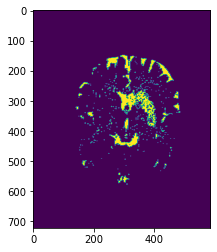

In [11]:
#For Cluster 2
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape(cerveau.shape)
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<140 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster2=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=250:
            Cluster2[i,j]=0
#Showing      
plt.imshow(Cluster2)

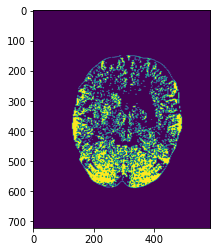

In [12]:
#For Cluster 3
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((cerveau.shape))
 
#plt.imshow(segmented_image)
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]<20:
            segmented_image[i,j]=0
        elif segmented_image[i,j]<130 and segmented_image[i,j]>=100:
            segmented_image[i,j]=120
        elif segmented_image[i,j]<180 and segmented_image[i,j]>=140:
            segmented_image[i,j]=179
        elif segmented_image[i,j]<200 and segmented_image[i,j]>=180:
            segmented_image[i,j]=250
            
Cluster3=segmented_image
for i in range(len(segmented_image)):
    for j in range (len(segmented_image[i])):
        if segmented_image[i,j]!=120:
            Cluster3[i,j]=0
#Shwoing
plt.imshow(Cluster3)

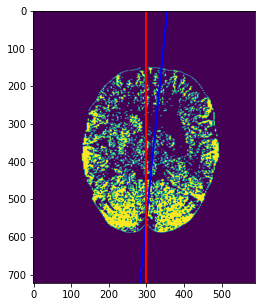

In [13]:
#Rotation du cluster
x1=[300,300]
y1=[0,1000]

#Affichage
plt.figure(figsize=(5,5))
plt.plot(x, y, color="blue", linewidth=2)
plt.plot(x1,y1,color="red",linewidth=2)
V=rotate(Cluster3, angle=np.arctan(10))
plt.imshow(V)

C:\Users\laure\AppData\Local\Temp\ipykernel_57388\2495557145.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Diff3=(res3-res03)/Cluster3
C:\Users\laure\AppData\Local\Temp\ipykernel_57388\2495557145.py:15: RuntimeWarning: invalid value encountered in true_divide
  Diff3=(res3-res03)/Cluster3


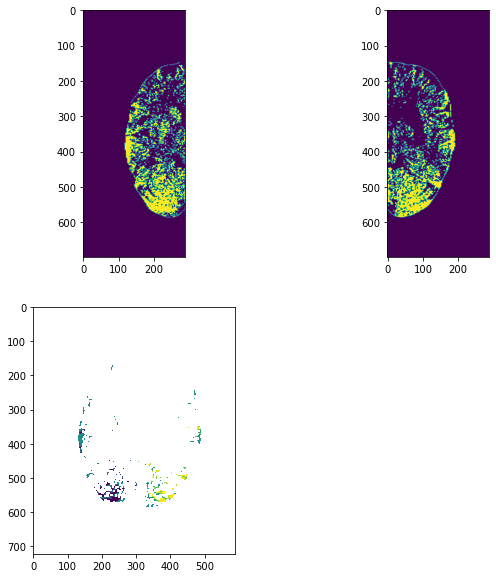

In [14]:
#Segmentation des deux parties du cerveau et affichage de la diffenrence entre les deux parties
ClustRotate3=rotate(Cluster3, angle=np.arctan(10))

rogne3 = ClustRotate3[:700, 12:300]
rogne03 = ClustRotate3[:700, 300:]
res3 = resize(rogne3, (722, 588))
res03 = resize(rogne03, (722, 588))

#Affichage
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(rogne3)
plt.subplot(2,2,2)
plt.imshow(rogne03)
Diff3=(res3-res03)/Cluster3
plt.subplot(2,2,3)
plt.imshow(Diff3)

C:\Users\laure\AppData\Local\Temp\ipykernel_57388\143009899.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Diff2=(res2-res02)/Cluster2
C:\Users\laure\AppData\Local\Temp\ipykernel_57388\143009899.py:15: RuntimeWarning: invalid value encountered in true_divide
  Diff2=(res2-res02)/Cluster2


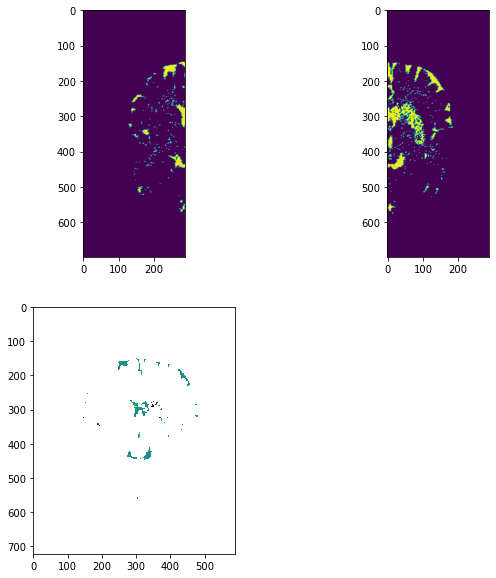

In [15]:
#Segmentation des deux parties du cerveau et affichage de la diffenrence entre les deux parties
ClustRotate2=rotate(Cluster2, angle=np.arctan(10))

rogne2 = ClustRotate2[:700, 12:300]
rogne02 = ClustRotate2[:700, 300:]
res2 = resize(rogne2, (722, 588))
res02 = resize(rogne02, (722, 588))

#Affichage
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(rogne2)
plt.subplot(2,2,2)
plt.imshow(rogne02)
Diff2=(res2-res02)/Cluster2
plt.subplot(2,2,3)
plt.imshow(Diff2)

C:\Users\laure\AppData\Local\Temp\ipykernel_57388\1007939333.py:15: RuntimeWarning: divide by zero encountered in true_divide
  Diff1=(res1-res01)/Cluster1
C:\Users\laure\AppData\Local\Temp\ipykernel_57388\1007939333.py:15: RuntimeWarning: invalid value encountered in true_divide
  Diff1=(res1-res01)/Cluster1


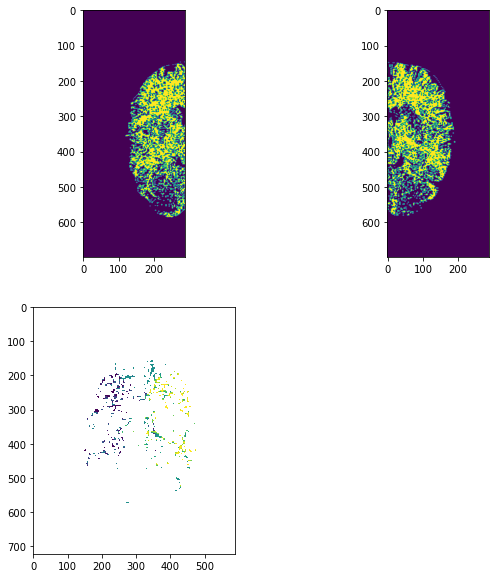

In [16]:
#Segmentation des deux parties du cerveau et affichage de la diffenrence entre les deux parties
ClustRotate1=rotate(Cluster1, angle=np.arctan(10))

rogne1 = ClustRotate1[:700, 12:300]
rogne01 = ClustRotate1[:700, 300:]
res1 = resize(rogne1, (722, 588))
res01 = resize(rogne01, (722, 588))

#Affichage
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(rogne1)
plt.subplot(2,2,2)
plt.imshow(rogne01)
Diff1=(res1-res01)/Cluster1
plt.subplot(2,2,3)
plt.imshow(Diff1)